# Linear Regression and Train/Test Split challenges
Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.)


In [117]:
##imports

import pandas as pd
pd.set_option('display.max_colwidth', 1000)
import numpy as np
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import scipy.stats as stats
from sklearn.cross_validation import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

df = pd.read_csv('2013_movies.csv')

### Challenge 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [70]:
df['ones'] = 1

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
ones                  100 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.3+ KB


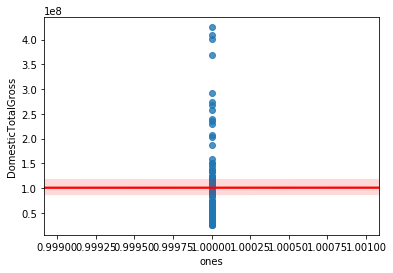

In [72]:
sns.regplot(x='ones', y='DomesticTotalGross', data = df, line_kws={'color':'red'});

The results of this model predicts the mean of the outcome variable.

In [73]:
# Define the model with one predictor of constants
lm1 = smf.ols('DomesticTotalGross ~ ones', data=df)
# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Feb 2018   Prob (F-statistic):                nan
Time:                        17:37:36   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
ones         5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                     3.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
pred = fit1.predict()
resid = fit1.resid

Text(0.5,1,'Residuals')

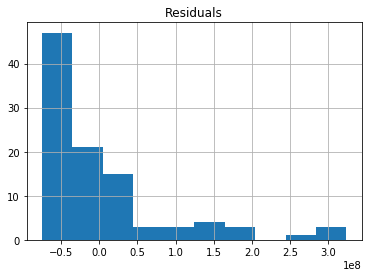

In [75]:
resid.hist();
plt.title("Residuals")

Text(0.5,1,'Predicted vs Observed')

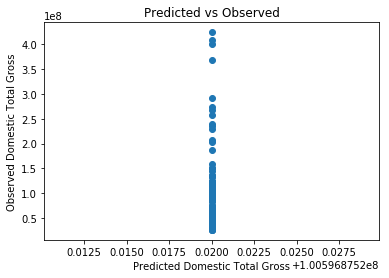

In [76]:
plt.scatter(pred,df.DomesticTotalGross)
plt.xlabel('Predicted Domestic Total Gross')
plt.ylabel('Observed Domestic Total Gross')
plt.title("Predicted vs Observed")

### Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?


In [77]:
# Define the model with an additional numeric predictor
lm1 = smf.ols('DomesticTotalGross ~ ones + Budget', data=df)
# Fit the model
fit2 = lm1.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           6.80e-08
Time:                        17:37:43   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.22e+07   6.33e+06      3.504      0.001    9.61e+06    3.48e+07
ones         2.22e+07   6.33e+06      3.504      0.001    9.61e+06    3.48e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     7.04e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
pred2 = fit2.predict()
resid2 = fit2.resid

In [99]:
dfq2 = df.dropna(subset = ['Budget'])

Text(0.5,1,'Predicted vs Observed')

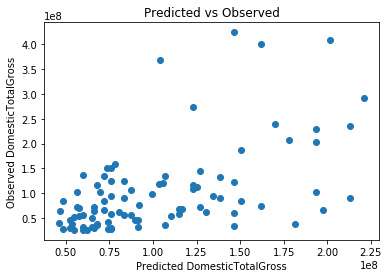

In [100]:
plt.scatter(pred2, dfq2.DomesticTotalGross)
plt.xlabel("Predicted DomesticTotalGross")
plt.ylabel("Observed DomesticTotalGross")
plt.title("Predicted vs Observed")

Text(0.5,1,'Residuals')

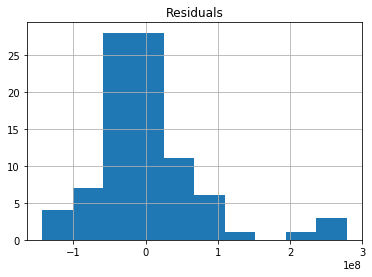

In [102]:
resid2.hist();
plt.title("Residuals")

### Challenge 3
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?


In [86]:
dfq3 = pd.concat([df, pd.get_dummies(df.Rating)], axis=1)

In [94]:
dfq3.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate', 'ones', 'G', 'PG', 'PG-13', 'R'],
      dtype='object')

In [95]:
# Define the model with an additional numeric predictor
lm1 = smf.ols('DomesticTotalGross ~ ones + G + PG + Q("PG-13") + R', data=dfq3)
# Fit the model
fit3 = lm1.fit()
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Fri, 02 Feb 2018   Prob (F-statistic):             0.0109
Time:                        17:44:46   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.455e+07   9.83e+06      6.568      0.000     4.5e+07    8.41e+07
ones        6.455e+07   9.83e+06      6.568      0.000     4.5e+07    8.41e+07
G           1.394e+08   6.55e+07      2.130      0.036    9.46e+06    2.69e+08
PG          2.031e+06   2.54e+07      0.080      0.936   -4.84e+07    5.25e+07
Q("PG-13") -1.765e+07   2.17e+07     -0.815      0.417   -6.07e+07    2.53e+07
R          -5.921e+07   2.22e+07     -2.670      0.009   -1.03e+08   -1.52e+07
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                     9.26e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.79e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
pred3 = fit3.predict()
resid3 = fit3.resid

Text(0.5,1,'Predicted vs Observed')

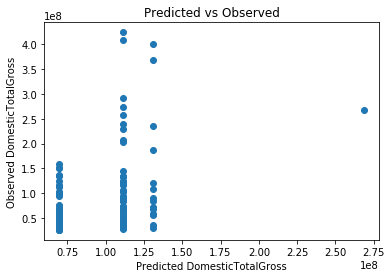

In [103]:
plt.scatter(pred3, dfq3.DomesticTotalGross)
plt.xlabel("Predicted DomesticTotalGross")
plt.ylabel("Observed DomesticTotalGross")
plt.title("Predicted vs Observed")

Text(0.5,1,'Residuals')

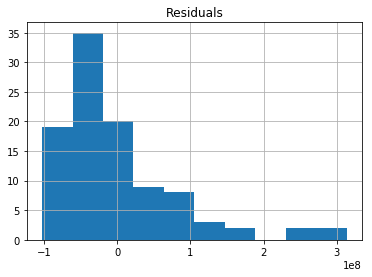

In [104]:
resid3.hist();
plt.title("Residuals")

### Challenge 4
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.


In [107]:
# Define the model with an additional numeric predictor
lm1 = smf.ols('DomesticTotalGross ~ ones + G + PG + Q("PG-13") + R + Runtime + Budget', data=dfq3)
# Fit the model
fit4 = lm1.fit()
# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           3.77e-06
Time:                        17:56:15   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.785e+06   2.32e+07     -0.250      0.803   -5.19e+07    4.03e+07
ones       -5.785e+06   2.32e+07     -0.250      0.803   -5.19e+07    4.03e+07
G           1.537e-07   5.06e-07      0.304      0.762   -8.52e-07    1.16e-06
PG          1.583e+07   1.53e+07      1.035      0.303   -1.46e+07    4.62e+07
Q("PG-13") -1.197e+07   1.54e+07     -0.776      0.440   -4.27e+07    1.87e+07
R          -9.641e+06   1.63e+07     -0.591      0.556   -4.21e+07    2.28e+07
Runtime     6.083e+05   5.21e+05      1.168      0.246   -4.27e+05    1.64e+06
Budget         0.7036      0.165      4.255      0.000       0.375       1.032
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     8.98e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [108]:
dfq4 = dfq3.dropna(subset = ['Budget'])

In [109]:
pred4 = fit4.predict()
resid4 = fit4.resid

Text(0.5,1,'Predicted vs Observed')

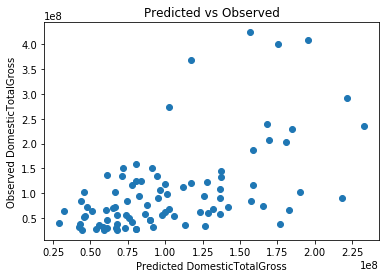

In [114]:
plt.scatter(pred4, dfq4.DomesticTotalGross)
plt.xlabel("Predicted DomesticTotalGross")
plt.ylabel("Observed DomesticTotalGross")
plt.title("Predicted vs Observed")

Text(0.5,1,'Residuals')

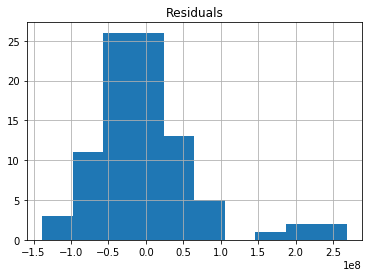

In [111]:
resid4.hist();
plt.title("Residuals")

### Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [119]:
#Split the dataset into independent variables and dependent

X = dfq4[['ones', 'G', 'PG', 'PG-13', 'R', 'Runtime', 'Budget']]

y = dfq4.DomesticTotalGross

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr.fit(X_train, y_train)
pred5 = lr.predict(X_test)

Text(0.5,1,'Predicted vs Observed')

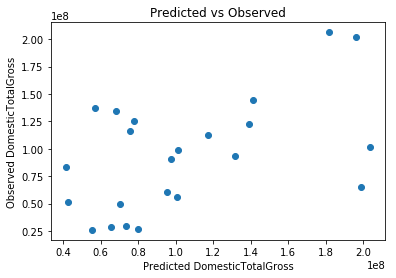

In [122]:
plt.scatter(pred5, y_test)
plt.xlabel("Predicted DomesticTotalGross")
plt.ylabel("Observed DomesticTotalGross")
plt.title("Predicted vs Observed")